In [1]:
!python3 main.py

Master Thesis Project: Galactic BVIJHK Leavitt Law Calibration 
     Refining systematic errors in luminosity, distance and reddening for individual Cepheid 
     Author: Shubham Mamgain (mshubham00@gmail.com) 
     Supervisor I: Dr. Jesper Storm (AIP Potsdam)
     Supervisor II: Prof. Dr. Maria Rosa Cioni 
 To start the analysis, store the datafile file in ./data/input/ directory. 
 Selection of datafile (k) and columns mapping must be done by editing ./lvtlaw/utils.py file. 
 Processed data will be saved in ./data/output directory. 
##########################################################################################
Press Enter to proceed
59  Galactic Cepheids loaded. (k = 0)
          name      logP     HST    EBV   M_B   M_V   M_I   M_J   M_H   M_K
0      RT Aur  0.571489   8.099  0.059 -2.31 -2.84 -3.40 -3.94 -4.15 -4.24
1      QZ Nor  0.578244  10.512  0.253 -1.83 -2.47 -3.15 -3.67 -3.91 -4.01
2      SU Cyg  0.584952   9.622  0.098 -2.61 -3.08 -3.63 -4.08 -4.28 -4.36
3     

In [1]:
import pandas as pd
from lvtlaw.a_utils import k, wes_show, dis_flag, mag, del_mu, R, regression
from visuals.dataload import transformation, PLWcorrection, del_del, pick_star, correction_red_mu_stars, result
absolute, extinction, tabsolute, wesenheit = transformation()
new_M,result_reg,c,d = result()
import matplotlib.pyplot as plt
absolute, extinction, tabsolute, wesenheit = transformation()
cepheid_names = tabsolute.name
n= len(absolute)
_, res, reg, pre = PLWcorrection()  
dpre_S, dres_S, dmc_S, dSM = del_del()
new_M,result_reg,c,d = result()
wes_show
dis_flag

['_h']

# Calibration Result

In [2]:
tab = {}
for dis in dis_flag:
    tab[dis] = tabsolute[['logP', 'EBV', 'HST']+[f'M_{m}0{dis}' for m in mag]]
    tab[dis].columns = ['period', 'reddening', 'distance','B', 'V', 'I', 'J', 'H', 'K']
#tab[dis].style
result = {}
for col in wes_show:
    for dis in dis_flag:
        result[col+dis] = new_M[['logP', f'EBV{dis}{col}', f'mu{dis}{col}']+[f'{m}{dis}{col}' for m in mag]]
        result[col+dis].columns = ['period', 'reddening', 'distance','B', 'V', 'I', 'J', 'H', 'K']
#result[col].style

In [3]:
cases = ['Raw']+wes_show
index = pd.MultiIndex.from_product(
    [cepheid_names, cases],
    names=['Name', 'Calibration'])

columns = pd.MultiIndex.from_tuples( [('Observables', obs) for obs in ['period', 'reddening', 'distance']]  + 
                                     [('Luminosity', f'M_{band}') for band in mag], 
                                     names=['Cepheid', 'Measurables'])
# Define MultiIndex rows
data = {}
for i, name in enumerate(cepheid_names):
    data[name] = {}
    
    # Loop through each calibration (raw, BV, VI, VK) and get the relevant data
    data[name]['Raw'] = tab[dis].loc[i]  # Assuming 'tab' is your DataFrame with raw data
    for col in wes_show:
        data[name][col] = result[col+dis].loc[i]  # Assuming 'result' contains the processed data

# Step 4: Flatten the dictionary into a list of rows for the DataFrame
records = []

for name in data:
    for transform in cases:
        row = data[name][transform]
        row.name = (name, transform)
        records.append(row) 
        
# Construct the final DataFrame
final_df = pd.DataFrame(records)
final_df.index = pd.MultiIndex.from_tuples(final_df.index, names=['Cepheid', 'Transform'])
# Optionally: Preview just the top
final_df.style

In [66]:
result['VK'].style

,period,reddening,distance,B,V,I,J,H,K
0,0.490098,0.624115,11.665259,-2.136079,-2.657152,-3.387922,-3.709900,-3.979136,-3.997151
1,0.498166,0.305141,9.497826,-2.263967,-2.797430,-3.420073,-3.798622,-4.102220,-4.141113
2,0.564814,0.344913,10.113997,-2.328428,-2.930067,-3.616351,-3.978305,-4.298643,-4.321571
3,0.578244,0.298394,11.965521,-2.392115,-2.980333,-3.606519,-4.030954,-4.326971,-4.381215
4,0.578408,0.132421,11.486294,-2.419607,-2.979014,-3.627348,-4.004189,-4.336712,-4.380193
5,0.586529,0.365583,10.964779,-2.479669,-3.011611,-3.591725,-4.046582,-4.374509,-4.418298
6,0.605768,0.354934,10.201119,-2.516952,-3.008556,-3.640153,-4.063878,-4.390624,-4.429545
7,0.609329,0.258843,9.544657,-2.479901,-3.083721,-3.726984,-4.127788,-4.450985,-4.506149
8,0.609712,0.388917,11.677891,-2.473517,-3.061094,-3.689663,-4.135703,-4.457264,-4.484380
9,0.623050,0.615405,10.674649,-2.500614,-3.011408,-3.623207,-4.136075,-4.443433,-4.445192


,period,reddening,distance,B,V,I,J,H,K
0,0.571489,0.059000,8.099000,-2.310000,-2.840000,-3.400000,-3.940000,-4.150000,-4.240000
1,0.578244,0.253000,10.512000,-1.830000,-2.470000,-3.150000,-3.670000,-3.910000,-4.010000
2,0.584952,0.098000,9.622000,-2.610000,-3.080000,-3.630000,-4.080000,-4.280000,-4.360000
3,0.635863,0.207000,11.783000,-2.790000,-3.310000,-3.900000,-4.330000,-4.580000,-4.660000
4,0.646934,0.064000,8.606000,-2.480000,-3.060000,-3.660000,-4.120000,-4.360000,-4.450000
5,0.650397,0.196000,7.756000,-2.460000,-3.020000,-3.640000,-4.090000,-4.290000,-4.370000
6,0.666501,0.289000,10.022000,-2.280000,-2.930000,-3.640000,-4.130000,-4.410000,-4.510000
7,0.687034,0.266000,11.338000,-2.620000,-3.230000,-3.880000,-4.360000,-4.600000,-4.700000
8,0.712165,0.299000,9.853000,-2.740000,-3.340000,-4.020000,-4.510000,-4.780000,-4.850000
9,0.726883,0.300000,11.146000,-2.560000,-3.220000,-3.910000,-4.360000,-4.640000,-4.730000


In [56]:
dmc.iloc[12:96].style.bar(subset=['err_mg', 'err_mi'], color='#d65f5f')

,Unnamed: 0,name,mg,cg,err_mg,err_cg,mi,ci,err_mi,err_ci
12,12,BBV,-3.605974,-6.284700,0.129101,0.037810,-3.577062,-6.322696,0.159318,0.046660
13,13,VBV,-3.605974,-6.284700,0.129101,0.037810,-3.577062,-6.322696,0.159318,0.046660
14,14,IBV,-3.401348,-6.148504,0.111013,0.032513,-3.372437,-6.186500,0.151229,0.044291
15,15,JBV,-3.216746,-5.889890,0.094446,0.027661,-3.187834,-5.927886,0.147224,0.043118
16,16,HBV,-3.206929,-6.010085,0.088108,0.025804,-3.178017,-6.048081,0.145834,0.042711
17,17,KBV,-3.179808,-5.919654,0.085842,0.025141,-3.150897,-5.957650,0.145482,0.042608
18,18,BBI,-3.224123,-6.030546,0.100623,0.029470,-3.195212,-6.068541,0.149189,0.043693
19,19,VBI,-3.314485,-6.090689,0.105190,0.030807,-3.285574,-6.128685,0.149628,0.043822
20,20,IBI,-3.224123,-6.030546,0.100623,0.029470,-3.195212,-6.068541,0.149189,0.043693
21,21,JBI,-3.131631,-5.833239,0.090588,0.026531,-3.102720,-5.871235,0.147387,0.043165


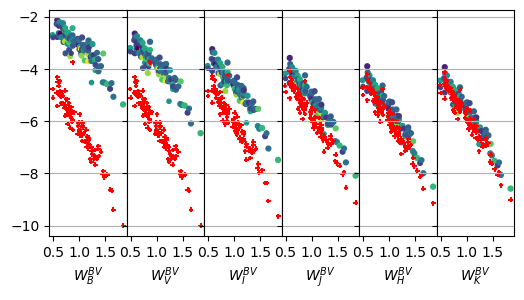

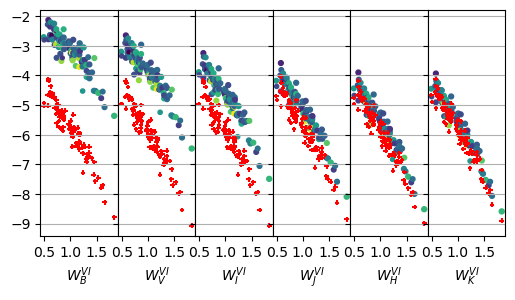

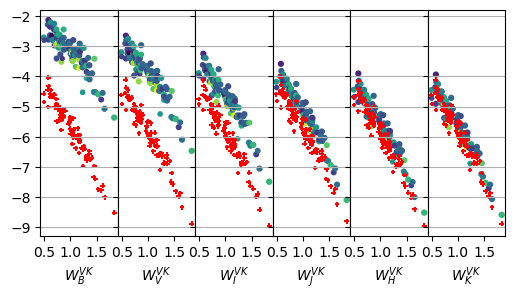

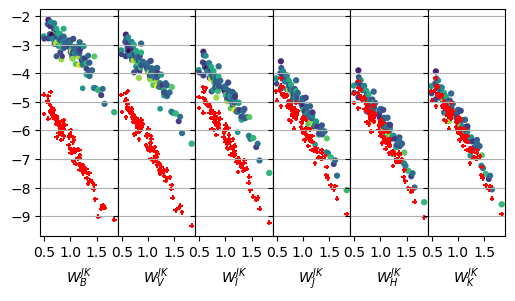

In [28]:
col = ['BV', 'VI','VK', 'JK']

def plt_wes(data, w, color, d, title,s=0):
    fig, axarr = plt.subplots(1,6, sharey=True,gridspec_kw={'hspace': 0, 'wspace': 0})
    fig = plt.gcf()
    fig.set_size_inches(6, 3)
    X = data['logP']
    for i,ax in enumerate(axarr):
        Y = data['M_'+mag[i]+'0'+d]
        ax.scatter(X, Y, label='$%s$'%(mag[i]), s=data['plx'], c = data['EBV'])
        Y = w[mag[i]+color+d]
        ax.scatter(X, Y, label='$%s$'%(mag[i]), s=data['plx'], c = 'r', marker='+')
        ax.set_xlabel('$W_%s^{%s}$'%(mag[i],color), fontsize=10)
        ax.grid(True, axis='y')
        #ax.invert_yaxis()  

    # change y positioning to be in the horizontal center of all Nlayer, i.e. dynamically Nlayer/2
    if s==1:
        save(title+color, img_out_path,0)
for i in col:
    plt_wes(true_absolute, wesenheit, i,'_g', 'PW_scatter',0)

In [199]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio  
def plt_wes_plotly(data, data2, w, d, title, s=0):
    col = ['BV', 'VI', 'VK', 'JK']  # 4 columns (color)
    #mag = ['BV', 'VI', 'VK', 'JK', 'X1', 'X2']  # 6 rows (magnitude)
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown']

    # Create a 6x4 subplot grid (6 rows for mag, 4 columns for col)
    fig = make_subplots(rows=6, cols=4, shared_xaxes=True, shared_yaxes=True, 
                        horizontal_spacing=0.05, vertical_spacing=0.05)

    X = data['logP']

    for row_idx, mag_name in enumerate(mag):  # Loop over magnitude rows
        for col_idx, color in enumerate(col):  # Loop over color columns
            Y = data[f'M_{mag_name}0{d}']  # First dataset Y-values
            Z = data2[f'M_{mag_name}{d}']  # First dataset Y-values
            trace1 = go.Scatter(x=X, y=Y,
                                marker=dict(color='black'),
                                name=f"{mag_name} Data")
            trace3 = go.Scatter(x=X, y=Z,
                                marker=dict(color='grey'),
                                name=f"{mag_name} Data")

            Y_w = w[f'{mag_name}{color}{d}']  # Second dataset Y-values
            trace2 = go.Scatter(x=X, y=Y_w,
                                marker=dict(color=colors[row_idx]),
                                name=f"{mag_name} Model")

            fig.add_trace(trace1, row=row_idx+1, col=col_idx+1)
            fig.add_trace(trace2, row=row_idx+1, col=col_idx+1)
            fig.add_trace(trace3, row=row_idx+1, col=col_idx+1)

            # Add annotation (subplot title inside the plot)
            fig.add_annotation(
                text=f"{mag_name} - {color}", 
                xref='x domain', yref='y domain',
                x=0.5, y=0.95, showarrow=False, font=dict(size=14, color="black"),
                row=row_idx+1, col=col_idx+1
            )

    # Invert the y-axis for all subplots
    fig.update_yaxes(autorange="reversed")
#    save('wesen_data', img_out_path,0)   
    # Update layout
    fig.update_layout(width=1000, height=800, showlegend=False)
    pio.write_image(fig, img_out_path+process_step[0]+title, format='pdf')
    fig.show()

# Run the function
plt_wes_plotly(true_absolute,absolute, wesenheit, '_i', 'wesen_data_i.pdf', 0)
plt_wes_plotly(true_absolute,absolute, wesenheit, '_g', 'wesen_data_g.pdf', 0)


In [17]:
df = pd.DataFrame([[38.0, 2.0, 18.0, 22.0, 21, np.nan],[19, 439, 6, 452, 226,232]],
                  index=pd.Index(['Tumour (Positive)', 'Non-Tumour (Negative)'], name='Actual Label:'),
                  columns=pd.MultiIndex.from_product([['Decision Tree', 'Regression', 'Random'],['Tumour', 'Non-Tumour']], 
                                                      names=['Model:', 'Predicted:']))
s = df.style

In [19]:
s = df.style.format('{:.0f}').hide([('Random', 'Tumour'), ('Random', 'Non-Tumour')], axis="columns")
s

AttributeError: 'Styler' object has no attribute 'hide'

In [16]:
dmc.style

,Unnamed: 0,name,mg,cg,err_mg,err_cg,mi,ci,err_mi,err_ci
0,0,B,-1.329547,-1.102119,0.356944,0.104539,-1.300636,-1.140115,0.372742,0.109166
1,1,V,-1.868244,-2.328531,0.273637,0.080140,-1.839332,-2.366527,0.292812,0.085756
2,2,I,-2.344809,-3.743154,0.170772,0.050014,-2.315897,-3.781150,0.202521,0.059313
3,3,J,-2.709328,-4.734689,0.101259,0.029656,-2.680417,-4.772685,0.153737,0.045025
4,4,H,-2.892399,-5.294019,0.083807,0.024545,-2.863488,-5.332015,0.144626,0.042357
5,5,K,-2.973018,-5.448870,0.081250,0.023796,-2.944107,-5.486866,0.143712,0.042089
6,6,B0,-1.915899,-3.209938,0.107926,0.031609,-1.886988,-3.247934,0.165879,0.048581
7,7,V0,-2.315840,-3.937554,0.099962,0.029276,-2.286929,-3.975550,0.155459,0.045530
8,8,I0,-2.616947,-4.721439,0.094615,0.027710,-2.588036,-4.759435,0.151056,0.044240
9,9,J0,-2.840027,-5.204523,0.088370,0.025881,-2.811116,-5.242519,0.148857,0.043596


In [24]:
file = '102_regression.csv'
data_dir = data_out+process_step[1]
dmc= load_data(file, data_dir, 1)

 
 Data Loaded from: 	 ./data/output/2_PLPW/102_regression.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  102 non-null    int64  
 1   name        102 non-null    object 
 2   mg          102 non-null    float64
 3   cg          102 non-null    float64
 4   err_mg      102 non-null    float64
 5   err_cg      102 non-null    float64
 6   mi          102 non-null    float64
 7   ci          102 non-null    float64
 8   err_mi      102 non-null    float64
 9   err_ci      102 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 8.1+ KB
None


In [290]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np

def 
fig = make_subplots(
    rows=8, cols=4,
    specs=[[{"rowspan": 2, "colspan": 4}, None, None, None],
           [ None, None, None, None],
           [{"rowspan": 2,"colspan": 4}, None, None, None],
           [ None, None, None, None],
           [{"rowspan": 2,"colspan": 4}, None, None, None],
           [ None, None, None, None],
           [{"rowspan": 2,"colspan": 4}, None, None, None],
           [ None, None, None, None]],
    horizontal_spacing=0,
    shared_xaxes=True,  # Share the x-axis between subplots
    print_grid=True)


x = list(range(0,6))
for i in range(2,7):
    x_jittered = x + np.random.uniform(-0.2, 0.2, size=len(x))
    y = dmc.mg.iloc[6*i:i*6+6]
    err_y = dmc.err_mg.iloc[6*i:(i+1)*6]  # Extract error values
    we = f"{dmc.name.iloc[6*i][1:]}"  # Proper LaTeX formatting    #print(x,y,we)
    fig.add_trace(go.Scatter(x=x_jittered, y=y, error_y=dict(type='data', array=err_y, visible=True), name=we), row=1, col=1)


#fig.add_trace(go.Scatter(x=[1, 2], y=[1, 2],mode="markers", name="(1,2)"), row=1, col=2)
for i in range(7,11):
    x_jittered = x + np.random.uniform(-0.2, 0.2, size=len(x))

    y = dmc.mg.iloc[6*i:i*6+6]
    err_y = dmc.err_mg.iloc[6*i:(i+1)*6]  # Extract error values
    we = '%s'%dmc.name.iloc[i*6][1:]
    #print(x,y,we)
    fig.add_trace(go.Scatter(x=x_jittered, y=y, error_y=dict(type='data', array=err_y, visible=True), name=we), row=3, col=1)

for i in range(11,14):
    x_jittered = x + np.random.uniform(-0.2, 0.2, size=len(x))
    y = dmc.mg.iloc[6*i:i*6+6]
    err_y = dmc.err_mg.iloc[6*i:(i+1)*6]  # Extract error values
    we = '%s'%dmc.name.iloc[i*6][1:]
    #print(x,y,we)
    fig.add_trace(go.Scatter(x=x_jittered, y=y, error_y=dict(type='data', array=err_y, visible=True), name=we), row=5, col=1)
for i in range(14,17):
    x_jittered = x + np.random.uniform(-0.2, 0.2, size=len(x))
    y = dmc.mg.iloc[6*i:i*6+6]
    err_y = dmc.err_mg.iloc[6*i:(i+1)*6]  # Extract error values
    we = '%s'%dmc.name.iloc[i*6][1:]
    #print(x,y,we)
    fig.add_trace(go.Scatter(x=x_jittered, y=y, error_y=dict(type='data', array=err_y, visible=True), name=we), row=7, col=1)

fig.add_annotation(
                text="B", 
                x=3, y=-3.4, showarrow=False, font=dict(size=14, color="black"),
                row=1, col=1
            )
fig.add_annotation(
                text=f"V", 
                x=3, y=-3.4, showarrow=False, font=dict(size=14, color="black"),
                row=3, col=1
            )
fig.add_annotation(
                text="I", 
                x=3, y=-3.4, showarrow=False, font=dict(size=14, color="black"),
                row=5, col=1
            )
fig.add_annotation(
                text="J & H", 
                x=3, y=-3.4, showarrow=False, font=dict(size=14, color="black"),
                row=7, col=1
            )

#fig.update_xaxes(title_text="X Axis 1", row=1, col=1)
#fig.update_yaxes(title_text="Y Axis 1", row=1, col=1)
fig.update_yaxes(autorange="reversed", row=1, col=1)
fig.update_yaxes(autorange="reversed", row=3, col=1)
fig.update_yaxes(autorange="reversed", row=5, col=1)
fig.update_yaxes(autorange="reversed", row=7, col=1)
fig.update_xaxes(
    tickvals=x,  # Define tick positions
    ticktext=mag,  # Set tick labels
    title_text="Bands"
)
fig.update_layout(height=600, width=600)
fig.show()

This is the format of your plot grid:
⎡ (1,1) x,y             -                -                -      ⎤
⎣      :                :                :                :      ⎦
⎡ (3,1) x2,y2           -                -                -      ⎤
⎣      :                :                :                :      ⎦
⎡ (5,1) x3,y3           -                -                -      ⎤
⎣      :                :                :                :      ⎦
⎡ (7,1) x4,y4           -                -                -      ⎤
⎣      :                :                :                :      ⎦



In [201]:
file = '102_regression.csv'
data_dir = data_out+process_step[1]
dmc= load_data(file, data_dir, 1)

 
 Data Loaded from: 	 ./data/output/2_PLPW/102_regression.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  102 non-null    int64  
 1   name        102 non-null    object 
 2   mg          102 non-null    float64
 3   cg          102 non-null    float64
 4   err_mg      102 non-null    float64
 5   err_cg      102 non-null    float64
 6   mi          102 non-null    float64
 7   ci          102 non-null    float64
 8   err_mi      102 non-null    float64
 9   err_ci      102 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 8.1+ KB
None


/tmp/ipykernel_32237/4001553748.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(['B']+mag)
/tmp/ipykernel_32237/4001553748.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['B']+mag)


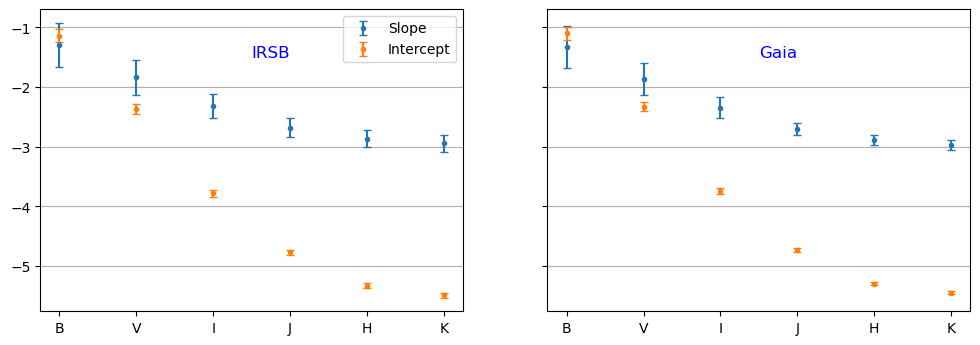

In [45]:
def get_mc(dmc=dmc):
    fig, (ax0, ax1) = plt.subplots(1, 2, sharey=True, figsize=(12, 4))
    
    # Assuming error_mg, error_cg, error_mi, error_ci are the error values you want to include
    # Error bars added to scatter plots
    ax0.errorbar(range(6), dmc.mi.iloc[0:6], yerr=dmc.err_mi.iloc[0:6], fmt='.', label='Slope', capsize=3)
    ax0.errorbar(range(6), dmc.ci.iloc[0:6], yerr=dmc.err_ci.iloc[0:6], fmt='.', label='Intercept', capsize=3)
    ax0.set_xticklabels(['B']+mag)

    ax1.errorbar(range(6), dmc.mg.iloc[0:6], yerr=dmc.err_mg.iloc[0:6], fmt='.', label='Mi', capsize=3)
    ax1.errorbar(range(6), dmc.cg.iloc[0:6], yerr=dmc.err_cg.iloc[0:6], fmt='.', label='Ci', capsize=3)
    ax1.set_xticklabels(['B']+mag)
    # Add legends, grid, and labels
    ax0.legend(loc='upper right')
    ax0.grid(True, axis='y')
    ax1.grid(True, axis='y')
    ax0.annotate('IRSB', 
                 xy=(2, -1), xycoords='data', 
                 xytext=(2.5, -1.5), textcoords='data',
                 fontsize=12, color='blue')  
    ax1.annotate('Gaia', 
                 xy=(2, -1), xycoords='data', 
                 xytext=(2.5, -1.5), textcoords='data',
                 fontsize=12, color='blue')  
    save('PL_slope', img_out_path,1)   
    # Show plot
    plt.show()

# Call function with error bars
# You should replace `error_mg`, `error_cg`, `error_mi`, and `error_ci` with your actual error values
get_mc(dmc)


In [209]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def get_mc(dmc=dmc):
    # Create a 1x2 subplot layout
    fig = make_subplots(rows=1, cols=2, shared_yaxes=True, 
                        subplot_titles=["Slope", "Intercept"], 
                        horizontal_spacing=0.1)

    # Plot for Slope (Mi and Ci)
    fig.add_trace(go.Scatter(x=list(range(6)), y=dmc.mi.iloc[0:6],
                             error_y=dict(type='data', array=dmc.err_mi.iloc[0:6], visible=True),
                             name='Slope Mi', marker=dict(color='blue', size=8)),
                  row=1, col=1)
    fig.add_trace(go.Scatter(x=list(range(6)), y=dmc.ci.iloc[0:6],
                             error_y=dict(type='data', array=dmc.err_ci.iloc[0:6], visible=True),
                             name='Slope Ci', marker=dict(color='red', size=8)),
                  row=1, col=1)

    # Plot for Intercept (Mg and Cg)
    fig.add_trace(go.Scatter(x=list(range(6)), y=dmc.mg.iloc[0:6], mode='markers', 
                             error_y=dict(type='data', array=dmc.err_mg.iloc[0:6], visible=True),
                             name='Intercept Mg', marker=dict(color='green', size=8)),
                  row=1, col=2)
    fig.add_trace(go.Scatter(x=list(range(6)), y=dmc.cg.iloc[0:6], mode='markers', 
                             error_y=dict(type='data', array=dmc.err_cg.iloc[0:6], visible=True),
                             name='Intercept Cg', marker=dict(color='purple', size=8)),
                  row=1, col=2)

    # Customize x-axis tick labels and add annotations
    fig.update_xaxes(tickvals=list(range(6)), ticktext=mag, row=1, col=1)
    fig.update_xaxes(tickvals=list(range(6)), ticktext=mag, row=1, col=2)

    # Annotations for IRSB and Gaia
    fig.add_annotation(text="IRSB", x=2, y=-1, showarrow=False, font=dict(size=12, color="blue"), row=1, col=1)
    fig.add_annotation(text="Gaia", x=2, y=-1, showarrow=False, font=dict(size=12, color="blue"), row=1, col=2)

    # Update layout and legend
    fig.update_layout(width=800, height=300,
                      showlegend=True)

    # Show the plot
    fig.show()

    # Save the figure
    #fig.write_image("PL_slope.pdf")

# Call the function with Plotly
get_mc(dmc)


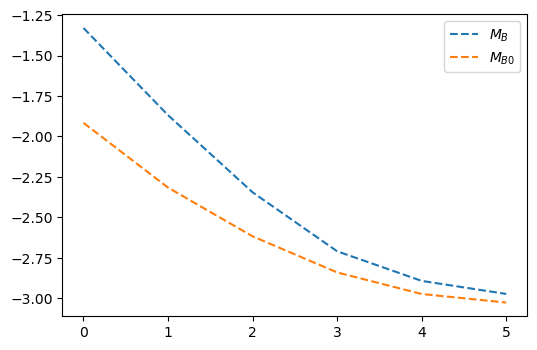

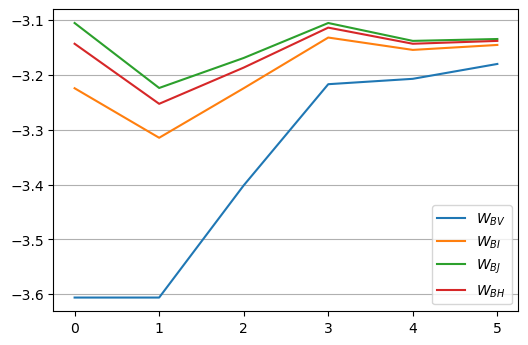

In [240]:
# Slope comparison of del-del plot

for i in range(0,2):
    #plt.axhline(y=1, color='k', linestyle='-'); 
    plt.plot([j for j in range(0,6)],dmc.mg.iloc[6*i:i*6+6], '--', label = '$M_{%s}$'%dmc.name.iloc[i*6],)
#    plt.plot([j for j in range(0,6)],dmc.mg.iloc[i+6:])
    plt.grid()
    plt.legend()
plt.show()
for i in range(2,6):
    #plt.axhline(y=1, color='k', linestyle='-'); 
    plt.plot([j for j in range(0,6)],dmc.mg.iloc[6*i:i*6+6], label = '$W_{%s}$'%dmc.name.iloc[i*6][1:])
    #plt.plot([j for j in range(0,6)],dmc[i+1].mg, col_das[int(i/2)-6], label = '$W_{%s}$'%dmc[i].columns[0])
    plt.grid(True, axis='y')

    plt.legend() 
plt.show()


In [225]:
dmc[12:42]

,Unnamed: 0,name,mg,cg,err_mg,err_cg,mi,ci,err_mi,err_ci
12,12,BBV,-3.605974,-6.284700,0.129101,0.037810,-3.577062,-6.322696,0.159318,0.046660
13,13,VBV,-3.605974,-6.284700,0.129101,0.037810,-3.577062,-6.322696,0.159318,0.046660
14,14,IBV,-3.401348,-6.148504,0.111013,0.032513,-3.372437,-6.186500,0.151229,0.044291
15,15,JBV,-3.216746,-5.889890,0.094446,0.027661,-3.187834,-5.927886,0.147224,0.043118
16,16,HBV,-3.206929,-6.010085,0.088108,0.025804,-3.178017,-6.048081,0.145834,0.042711
17,17,KBV,-3.179808,-5.919654,0.085842,0.025141,-3.150897,-5.957650,0.145482,0.042608
18,18,BBI,-3.224123,-6.030546,0.100623,0.029470,-3.195212,-6.068541,0.149189,0.043693
19,19,VBI,-3.314485,-6.090689,0.105190,0.030807,-3.285574,-6.128685,0.149628,0.043822
20,20,IBI,-3.224123,-6.030546,0.100623,0.029470,-3.195212,-6.068541,0.149189,0.043693
21,21,JBI,-3.131631,-5.833239,0.090588,0.026531,-3.102720,-5.871235,0.147387,0.043165


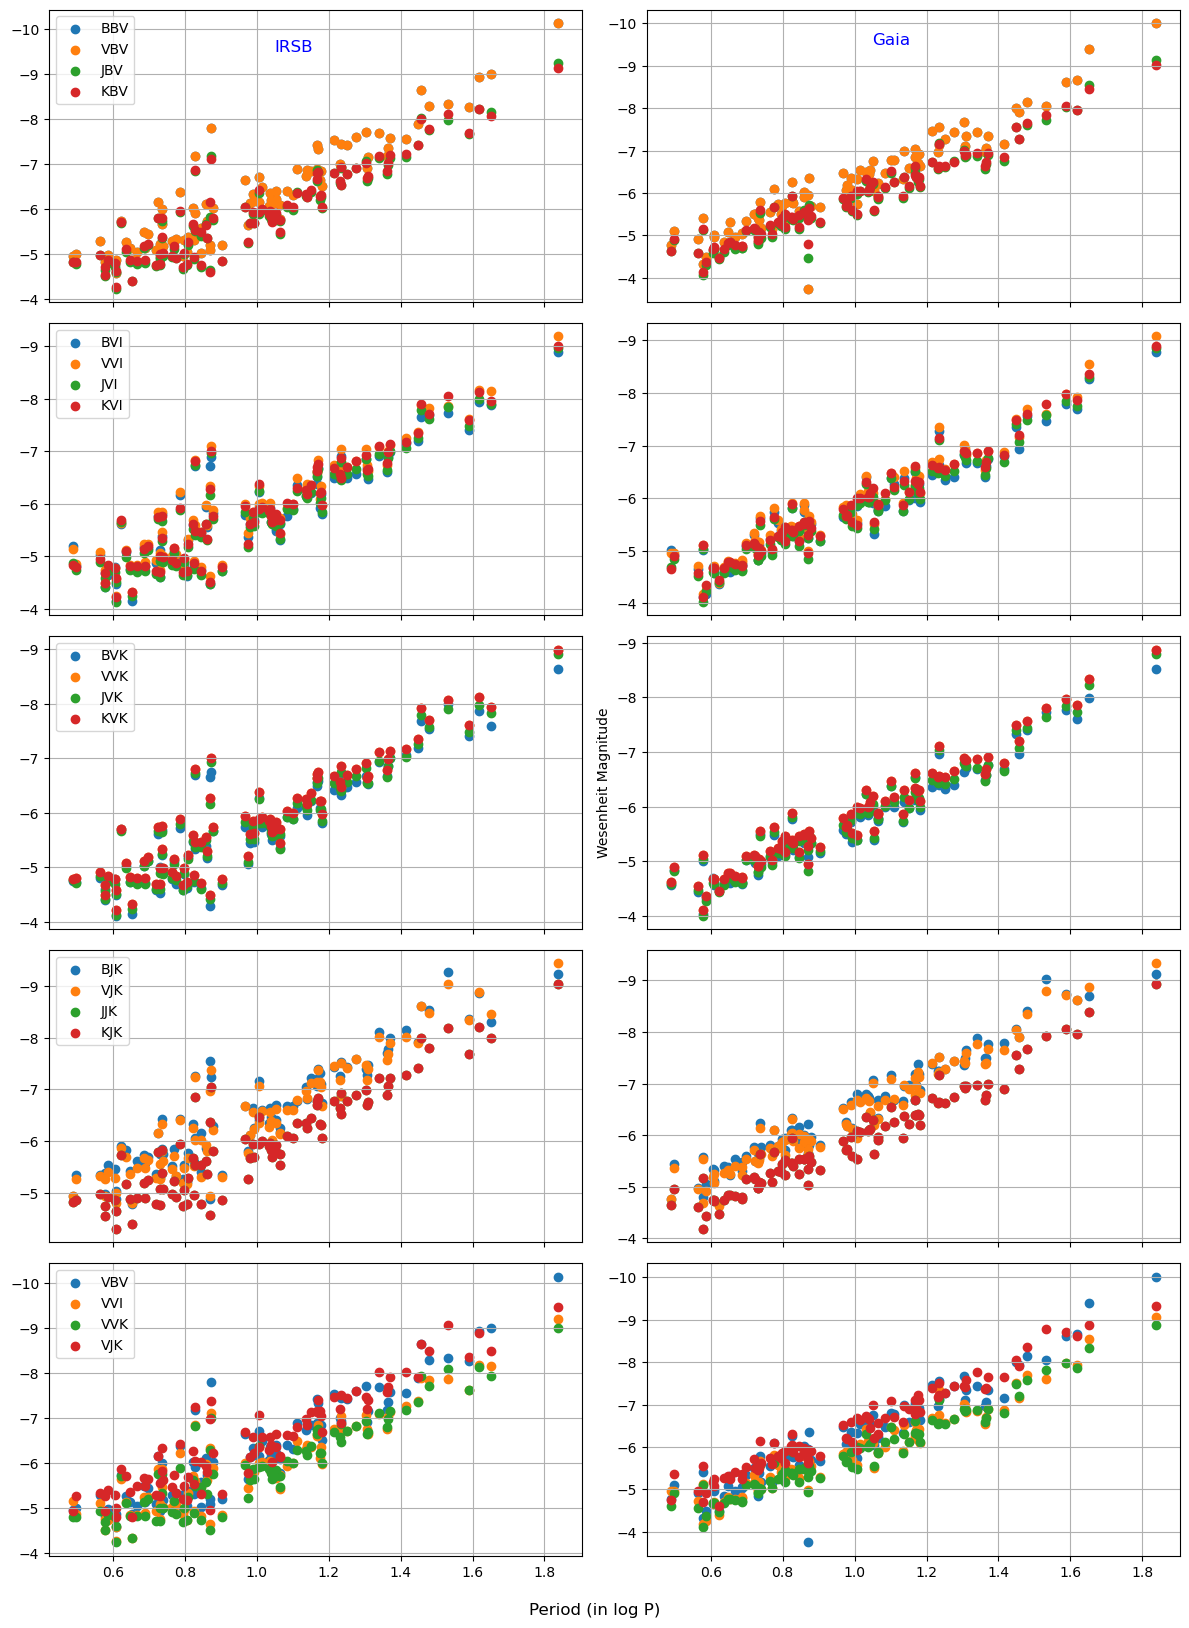

In [5]:
col = ['BV', 'VI','VK', 'JK']
def get_wesenheit(wesenheit, col):
    p = wesenheit['logP']
    
    # Create 4x2 subplots, sharing the y-axis and x-axis
    fig, ax = plt.subplots(5, 2, sharex=True, figsize=(12, 16))
    ax = ax.flatten()
    
    # Loop through the subplots and plot data
    for i in range(0, 8, 2):
        for b in ['B', 'V', 'J', 'K']:
            l = b + col[int(i / 2)] + '_i'  # Left column data
            r = b + col[int(i / 2)] + '_g'  # Right column data
            
            # Plot scatter for the left and right columns
            ax[i].scatter(p, wesenheit[l], label=f'{b}{col[int(i / 2)]}')
            ax[i + 1].scatter(p, wesenheit[r], label=f'{b}{col[int(i / 2)]}')
            
            # Add legends
            ax[i].legend(loc='upper left')
            #ax[i + 1].legend(loc='upper right')
            
            # Turn on the grid
            ax[i].grid(True)
            ax[i + 1].grid(True)

    for c in col:
        l = 'V'+c + '_i'
        r = 'V'+c + '_g'
        ax[8].scatter(p, wesenheit[l], label=f'V{c}')
        ax[9].scatter(p, wesenheit[r], label=f'V{c}')
        ax[8].legend(loc='upper left')
        ax[8].grid(True)
        ax[9].grid(True)

    
    # Invert the y-axis for all subplots by setting the y-limits
    for axis in ax:
        axis.set_ylim(axis.get_ylim()[::-1])  # Reverse the y-limits to invert the y-axis

    # Add annotations to specific subplots
    ax[0].annotate('IRSB', 
                 xy=(1, -5), xycoords='data', 
                 xytext=(1.05, -9.5), textcoords='data',
                 fontsize=12, color='blue')  

    ax[1].annotate('Gaia', 
                 xy=(1, -5), xycoords='data', 
                 xytext=(1.05, -9.5), textcoords='data',
                 fontsize=12, color='blue') 
    
    # Add a common x-axis label for all subplots
    fig.text(0.5, -0.01, 'Period (in log P)', ha='center', va='center', fontsize=12)
    ax[5].set_ylabel('Wesenheit Magnitude')

    # Adjust the layout
    plt.tight_layout()
    
    # Save the figure (if required)
    save('wesen_data', img_out_path, 0)  # Ensure this function is defined elsewhere
    # Show the plot
    plt.show()

# Assuming `wesenheit` and `col` are defined elsewhere
get_wesenheit(wesenheit, col)


In [3]:
file = '102_regression.csv'
data_dir = data_out+process_step[1]
dmc= load_data(file, data_dir, 1)

 
 Data Loaded from: 	 ./data/output/2_PLPW/102_regression.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  102 non-null    int64  
 1   name        102 non-null    object 
 2   mg          102 non-null    float64
 3   cg          102 non-null    float64
 4   err_mg      102 non-null    float64
 5   err_cg      102 non-null    float64
 6   mi          102 non-null    float64
 7   ci          102 non-null    float64
 8   err_mi      102 non-null    float64
 9   err_ci      102 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 8.1+ KB
None


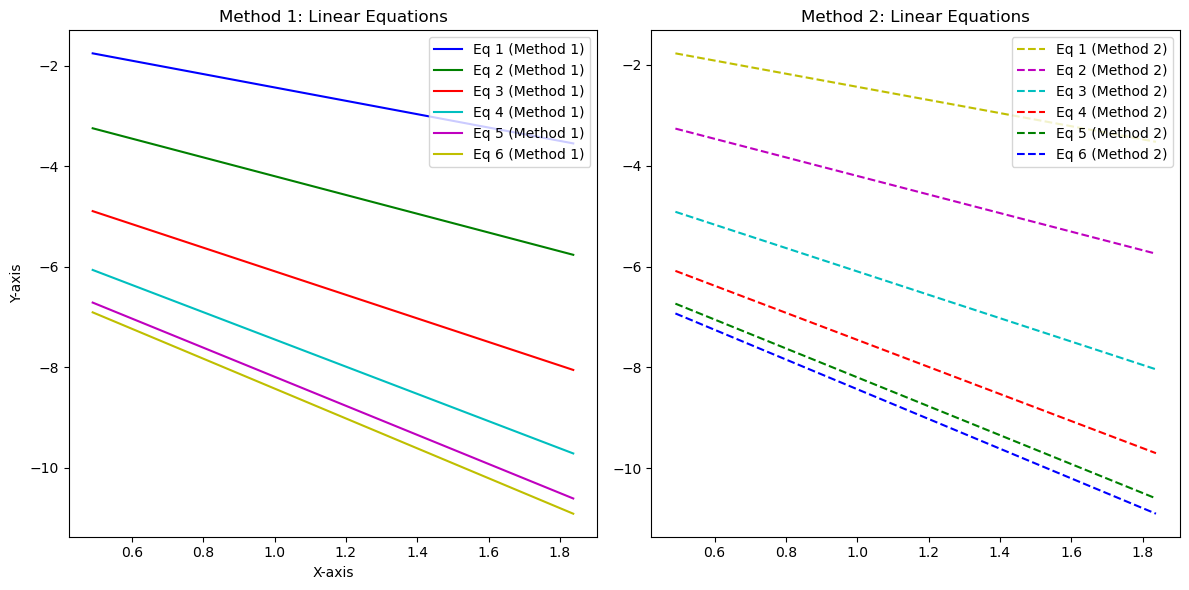

In [24]:
import matplotlib.pyplot as plt

def plot_linear_equations(xvalues, method1_df, method2_df):
    """
    Plots two subplots with the same 6 linear equations using data from two methods.
    
    Args:
        method1_df (pd.DataFrame): DataFrame containing slope and intercept for method 1.
        method2_df (pd.DataFrame): DataFrame containing slope and intercept for method 2.
    """
    # Ensure data is in correct format
    assert method1_df.shape[0] == method2_df.shape[0] == 6, "There should be exactly 6 rows in both DataFrames"
    # Set up the subplots with a common x-axis and inverted y-axis
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(12, 6))
    #ax1.set_ylim(ax1.get_ylim()[::-1])  # Invert the y-axis of the first subplot
    #ax2.set_ylim(ax2.get_ylim()[::-1])  # Invert the y-axis of the second subplot
    
    # Loop through each equation (6 in total) and plot both methods
    colors = ['b', 'g', 'r', 'c', 'm', 'y']  # Different colors for each equation
    
    for i in range(6):
        # Extract slope and intercept from both methods
        m1, b1 = method1_df.iloc[i]
        m2, b2 = method2_df.iloc[i]
        # Calculate y values for both methods
        y1_values = m1 * xvalues + b1
        y2_values = m2 * xvalues + b2
        
        # Plot method 1 and method 2 equations with the same color
        ax1.plot(xvalues, y1_values, label=f'Eq {i+1} (Method 1)', color=colors[i])
        ax2.plot(xvalues, y2_values, label=f'Eq {i+1} (Method 2)', color=colors[5-i], linestyle = '--')
    
    # Set titles and labels
    ax1.set_title('Method 1: Linear Equations')
    ax2.set_title('Method 2: Linear Equations')
    
    ax1.set_xlabel('X-axis')
    ax1.set_ylabel('Y-axis')
    
    # Display legends
    ax1.legend(loc='upper right')
    ax2.legend(loc='upper right')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

# Create DataFrames for both methods
method1_df = dmc[['mg', 'cg']][0:6]
method2_df = dmc[['mi', 'ci']][0:6]

xvalues = df.logP
# Call the function to plot
plot_linear_equations(xvalues, method1_df, method2_df)


In [46]:
dmc

,Unnamed: 0,name,mg,cg,err_mg,err_cg,mi,ci,err_mi,err_ci
0,0,B,-1.329547,-1.102119,0.356944,0.104539,-1.300636,-1.140115,0.372742,0.109166
1,1,V,-1.868244,-2.328531,0.273637,0.080140,-1.839332,-2.366527,0.292812,0.085756
2,2,I,-2.344809,-3.743154,0.170772,0.050014,-2.315897,-3.781150,0.202521,0.059313
3,3,J,-2.709328,-4.734689,0.101259,0.029656,-2.680417,-4.772685,0.153737,0.045025
4,4,H,-2.892399,-5.294019,0.083807,0.024545,-2.863488,-5.332015,0.144626,0.042357
...,...,...,...,...,...,...,...,...,...,...
97,97,VHK,-3.168548,-4.826131,0.134011,0.039248,-3.139637,-4.864127,0.177141,0.051880
98,98,IHK,-3.135394,-5.261695,0.106012,0.031048,-3.106483,-5.299690,0.156988,0.045978
99,99,JHK,-3.089018,-5.463988,0.089941,0.026341,-3.060106,-5.501984,0.149058,0.043655
100,100,HHK,-3.127755,-5.746084,0.084140,0.024642,-3.098843,-5.784080,0.146409,0.042879


In [1]:
for i in range(0,2):#int(102/6)):
    #print(dmc.name.iloc[6*i:6*i+6])
    y = dmc.mg.iloc[6*i:6*i+6]
    z = dmc.cg.iloc[6*i:6*i+6]
    yerr = dmc.err_mg.iloc[6*i:6*i+6]
    zerr = dmc.err_cg.iloc[6*i:6*i+6]
    x = [0,1,2,3,4,5]
    plt.plot(x,y, label = dmc.name.iloc[6*i])
    plt.plot(x,z, label = dmc.name.iloc[6*i])
#    plt.errorbar(x, y, yerr=yerr, fmt='o', capsize=5)
    plt.errorbar(x, z, zerr=zerr, fmt='o', capsize=5)
    plt.legend( loc = 'upper right')
plt.show()

NameError: name 'dmc' is not defined